In [37]:
# import libraries
import pandas as pd
import numpy as np
from datetime import date
import missingno as msno
import os

In [38]:
# load data
folder_path = "assets"
sub_folder_path = "crime_rate"
house_path = 'updated_house_price.csv'
pop_growth_path_1 = 'population_growth_2000_2010.csv'
pop_growth_path_2 = 'population_growth_2010-2020.csv'
pop_growth_path_3 = 'population_growth_2020-2021.csv'
unemploy_path = 'wake_unemployment.csv'
covid_path = 'covid_confirmed.csv'
mort_rate_path = 'mort_rate.csv'
lumber_path = 'lumber.csv'
metals_path = 'metals.csv'
build_material_path = 'build_material.csv'
int_rate_path = 'int_rate.csv'
us_house_supply_path = 'HousingSupply.xlsx'
us_house_demand_path = 'HAI.xlsx'
wake_supply_path = 'market_hotness_supply_index.csv'
wake_demand_path = 'market_hotness_demand_index.csv'

crime_apex_path = 'apex.csv'
crime_cary_path = 'cary.csv'
crime_fuquay_varina_path = 'fuquay_varina.csv'
crime_garner_path = 'garner.csv'
crime_holly_springs_path = 'hollyspring.csv'
crime_morrisville_path = 'morrisville.csv'
crime_knightdale_path = 'knightdale.csv'
crime_raleigh_path = 'raleigh.csv'
crime_rolesville_path = 'rolesville.csv'
crime_wake_forest_path = 'wake_forest.csv'
crime_wendell_path = 'wendell.csv'
crime_zenbulon_path = 'zenbulon.csv'
# file extension
csv = 'csv'
xlsx = 'xlsx'
# encoding type
encoding_format='latin-1'

# date format
date_format_ym = '%Y-%m'
date_format_y = '%Y'

# add mortgage rate
mort_rate_2022 = {'date': '2022-09', 'Rate': 6.82}

# population growth
state_name = 'North Carolina'
state_short_name = 'NC'
county_name = 'Wake County'
# add population growth
added_pop_growth = [
                    {'year': '2000', 'pop_growth_rate': 0.018},
                    {'year': '2022', 'pop_growth_rate': 0.025}
                    ]
pop_growth_drop_cols = [
    'SUMLEV', 'REGION', 'DIVISION', 
    'STATE', 'COUNTY', 'STNAME'
    ]
pop_growth_range_one = "2000-2010"
pop_growth_range_two = "2011-2020"
pop_growth_range_three = "2021-2022"
pop_growth_one_drop_cols = [
    'ESTIMATESBASE2000', 'CENSUS2010POP', 'POPESTIMATE2000', 
    'POPESTIMATE2001', 'POPESTIMATE2002', 'POPESTIMATE2003', 
    'POPESTIMATE2004', 'POPESTIMATE2005', 'POPESTIMATE2006', 
    'POPESTIMATE2007', 'POPESTIMATE2008', 'POPESTIMATE2009', 
    'POPESTIMATE2010'
    ]
pop_growth_two_cols = [
    'CTYNAME', 'rate_2011', 'rate_2012', 
    'rate_2013', 'rate_2014', 'rate_2015', 
    'rate_2016', 'rate_2017', 'rate_2018', 
    'rate_2019', 'rate_2020'
    ]
pop_growth_three_cols = ['CTYNAME', 'rate_2021']
pop_growth_index_col = 'CTYNAME'

pop_growth_one_rate_cols = [
    'rate_2001', 'rate_2002', 'rate_2003',
    'rate_2004', 'rate_2005', 'rate_2006',
    'rate_2007', 'rate_2008', 'rate_2009',
    'rate_2010'
]
pop_growth_two_rate_cols = [
    'rate_2011', 'rate_2012', 'rate_2013',
    'rate_2014', 'rate_2015', 'rate_2016',
    'rate_2017', 'rate_2018', 'rate_2019',
    'rate_2020'
]
pop_growth_three_rate_cols = ['rate_2021']

pop_growth_one_year_cols = [
    'POPESTIMATE2001', 'POPESTIMATE2002', 'POPESTIMATE2003',
    'POPESTIMATE2004', 'POPESTIMATE2005', 'POPESTIMATE2006',
    'POPESTIMATE2007', 'POPESTIMATE2008', 'POPESTIMATE2009',
    'POPESTIMATE2010'
]
pop_growth_two_year_cols = [
    'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
    'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
    'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019',
    'POPESTIMATE2020'
]
pop_growth_three_year_cols = ['POPESTIMATE2020', 'POPESTIMATE2021']
# covid case
start_date = '2000-01-01'
covid_date = '2020-01-21'
end_date = '2022-09-15'
# raw materials
material_date = '2000-01'
material_lumber = 'lumber'
material_metal = 'metal'
material_build = 'building'
raw_material_date_col = 'date'
lumber_price_col = 'lumber_price'
metals_price_col = 'metals_price'
build_material_price_col = 'build_price'
# interest rate
country_name = 'USA'
int_rate_date = '2000-01'
int_rate_drop_cols = ['Country Name', 'Indicator Name', 'Indicator Code']
int_rate_save_path = 'us_int_rate.csv'
# house market
us_house_date = '2000-01'
us_house_supply_name = 'supply'
us_house_demand_name = 'demand'
us_house_start_date = '2000-01-01'
us_house_end_date = '2021-12-31'
date_list = [
    '2017-01', '2017-02', '2017-03', '2017-04', 
    '2017-05', '2017-06', '2017-07'
    ]
wake_supply_name = 'wake_supply_index'
wake_demand_name = 'wake_demand_index'
# crime data
apex_city = 'apex'
cary_city = 'cary'
fuquay_varina_city = 'fuquay_varina'
garner_city = 'garner'
holly_springs_city = 'hollyspring'
morrisville_city = 'morrisville'
knightdale_city = 'knightdale'
raleigh_city = 'raleigh'
rolesville_city = 'rolesville'
wake_forest_city = 'wake_forest'
wendell_city = 'wendell'
zenbulon_city = 'zenbulon'

# add missing crime data
apex_added_year = 2007
knightdale_added_year = [2002, 2003]
hollysprings_added_year = 2008
raleigh_added_year = [2015,2016,2017]
rolesville_added_year = 2008
wake_forest_added_year = 2000
zenbulon_added_year = 2000

apex_start = 0
apex_end = 7
knightdale_start = [0,1]
knightdale_end = [4,5]
hollysprings_start = 6
hollysprings_end = 10
raleigh_start = [12,13,14]
raleigh_end = [15,16,17]
rolesville_start=4
rolesville_end=8
wake_forest_start=0
wake_forest_end=4
zenbulon_start=0
zenbulon_end=4
# final data
removed_column = [
    'type_and_use','street_number', 'street_name', 
    'street_type', 'planning_jurisdiction', 'address'
]

In [39]:
def namestr(obj, namespace):
    """Extract variable name from namespace"""
    return [name for name in namespace if namespace[name] is obj]

In [40]:
def read_file(
    file_ext, file_path, folder_path, sub_folder_path=None, 
    print_columns=False, encoding=None, sheet_name=None):
    """Read file based on file extension
    
    Args:
        file_ext (str): file extension
        file_path (str): file path
        print_columns (bool, optional): print columns. Defaults to False.
        encoding (str, optional): encoding. Defaults to None.
        sheet_name (str, optional): sheet name. Defaults to None.
    """
    if sub_folder_path == None:
        new_file_path = os.path.join(folder_path, file_path)
    else:
        new_file_path = os.path.join(folder_path, sub_folder_path, file_path)
    if file_ext == 'csv':
        if encoding != None:
            df = pd.read_csv(new_file_path, encoding=encoding)
        else:
            df = pd.read_csv(new_file_path)
    elif file_ext == 'xlsx':
        if sheet_name != None:
            df = pd.read_excel(new_file_path, sheet_name=sheet_name)
        else:
            df = pd.read_excel(new_file_path)
    if print_columns:
        print(df.columns)
    if sheet_name != None:
        print(f"The data {namestr(file_path, globals())}, \
            {sheet_name} sheet is loaded successfully!")
    else:
        print(f"The data {namestr(file_path, globals())} is loaded successfully!")
    
    return df

In [41]:
def mortgage_rate_df(house_df, mort_rate_df, added_mort_rate=None):
    """Add mortgage rate to house dataframe
    
    Args:
        house_df (dataframe): house dataframe
        mort_rate_df (dataframe): mortgage rate dataframe
        added_mort_rate (dict, optional): missing mortgage rate. Defaults to None.
    """
    mort_rate_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
    mort_rate_df['date'] = pd.to_datetime(mort_rate_df['date'])
    mort_rate_df['date'] = mort_rate_df['date'].dt.strftime(date_format_ym)
    if added_mort_rate != None:
        mort_rate_df = mort_rate_df.append(added_mort_rate, ignore_index=True)
        print(f"The new mortgage rate data \
             {namestr(added_mort_rate, globals())[0]} is added successfully!")
    else:
        pass
    house_df['Deed_Date'] = pd.to_datetime(house_df['Deed_Date'])
    house_df['Deed_Date'] = house_df['Deed_Date'].dt.strftime(date_format_ym)
    house_df.drop(columns=['Unnamed: 0'], inplace=True)

    updated_house_df = house_df.merge(mort_rate_df, left_on='Deed_Date', right_on='date', how='left')
    updated_house_df.rename(columns={'Rate': 'mort_rate'}, inplace=True)
    updated_house_df.drop(columns=['date'], inplace=True)
    updated_house_df.columns = map(str.lower, updated_house_df.columns)
    print(updated_house_df.shape)
    print(f"The mortgage rate data is merged successfully!")
    return updated_house_df


In [42]:
def unemployment_rate_df(unemployment_df, updated_house_df):
    """Add unemployment rate to house dataframe    
    
    Args:
        unemployment_df (dataframe): unemployment dataframe
        updated_house_df (dataframe): house dataframe
    """
    unemployment_df['Year'] = unemployment_df['Year'].astype(str)
    unemployment_df['Month'] = unemployment_df['Month'].astype(str)
    unemployment_df['date'] = unemployment_df['Year'] + '-' + unemployment_df['Month']
    unemployment_df['date'] = pd.to_datetime(unemployment_df['date'])
    unemployment_df['date'] = unemployment_df['date'].dt.strftime(date_format_ym)
    unemployment_df.rename(columns={'Unemployment Rate(%)': 'unemploy_rate'}, inplace=True)
    unemployment_df = unemployment_df[['date', 'unemploy_rate']].copy()
    
    updated_house_df = updated_house_df.merge(unemployment_df, left_on='deed_date', right_on='date', how='left')
    updated_house_df.drop(columns=['date'], inplace=True)
    print(updated_house_df.shape)
    print(f"The unemployment rate data is merged successfully!")
    return updated_house_df

In [43]:
def pre_population_growth_df(
    population_growth_df, updated_house_df, state_name, 
    county_name, year_range):
    """Pre process population growth dataframes by city
    Removed unnecessary columns and rows
    Calculate population growth rate
    Combine population growth rates by year
    
    Args:
        population_growth_df (dataframe): population growth dataframe
        updated_house_df (dataframe): house dataframe
        state_name (str): state name
        county_name (str): county name
        year_range (list): year range
    """
    population_growth_df = population_growth_df.loc[population_growth_df['STNAME'] == state_name]
    population_growth_df = population_growth_df.loc[population_growth_df['CTYNAME'] == county_name]
    population_growth_df.drop(columns=pop_growth_drop_cols, inplace=True)
    
    if year_range == pop_growth_range_one:
        for rate_item in range(len(pop_growth_one_rate_cols)):
            for pop_item in range(0, len(pop_growth_one_year_cols)-1):
                population_growth_df[pop_growth_one_rate_cols[rate_item]] = \
                    (population_growth_df[pop_growth_one_year_cols[pop_item + 1]] - population_growth_df[pop_growth_one_year_cols[pop_item]]) / population_growth_df[pop_growth_one_year_cols[pop_item]]
        
        population_growth_df.drop(columns=pop_growth_one_drop_cols, inplace=True)
        population_growth_df.set_index(pop_growth_index_col, inplace=True)
    elif year_range == pop_growth_range_two:
        for rate_item in range(len(pop_growth_two_rate_cols)):
            for pop_item in range(0, len(pop_growth_two_year_cols)-1):
                population_growth_df[pop_growth_two_rate_cols[rate_item]] = \
                (population_growth_df[pop_growth_two_year_cols[pop_item + 1]] - population_growth_df[pop_growth_two_year_cols[pop_item]]) / population_growth_df[pop_growth_two_year_cols[pop_item]]
        
        population_growth_df = population_growth_df[pop_growth_two_cols].copy()
        population_growth_df.set_index(pop_growth_index_col, inplace=True)
    elif year_range == pop_growth_range_three:
        for rate_item in range(len(pop_growth_three_rate_cols)):
            for pop_item in range(0, len(pop_growth_three_year_cols)-1):
                population_growth_df[pop_growth_three_rate_cols[rate_item]] = \
                    (population_growth_df[pop_growth_three_year_cols[pop_item + 1]] - population_growth_df[pop_growth_three_year_cols[pop_item]]) / population_growth_df[pop_growth_three_year_cols[pop_item]]
        
        population_growth_df = population_growth_df[pop_growth_three_cols].copy()
        population_growth_df.set_index(pop_growth_index_col, inplace=True)
    print(f"Population growth data {year_range} has been processed successfully")
    return population_growth_df

In [44]:
def final_pop_growth_df(
    pop_growth_df_1, pop_growth_df_2, pop_growth_df_3, 
    updated_house_df, added_pop_growth=None):
    """Combine population growth dataframe with housing dataframe
    
    Args:
    ----------
    pop_growth_df_1 : pandas dataframe
        Population growth dataframe for 2000-2010
    pop_growth_df_2 : pandas dataframe
        Population growth dataframe for 2011-2020
    pop_growth_df_3 : pandas dataframe
        Population growth dataframe for 2021
    updated_house_df : pandas dataframe
        Housing dataframe with population growth data
    added_pop_growth : pandas dataframe, optional
    """
    pop_growth_df = pd.concat([pop_growth_df_1, pop_growth_df_2, pop_growth_df_3], axis=1)
    final_pop_growth = pop_growth_df.transpose()
    final_pop_growth.reset_index(inplace=True)
    final_pop_growth.rename(columns={'index':'year', 'Wake County':'pop_growth_rate'}, inplace=True)
    final_pop_growth['year'] = final_pop_growth['year'].str.split('_').str[1]
    final_pop_growth['year'] = pd.to_datetime(final_pop_growth['year'], format=date_format_y)
    final_pop_growth['year'] = final_pop_growth['year'].dt.strftime(date_format_y)

    final_pop_growth.rename_axis(None, axis=1, inplace=True)
    if added_pop_growth != None:
        final_pop_growth = final_pop_growth.append(added_pop_growth, ignore_index=True)
    final_pop_growth.sort_values(by='year', inplace=True)
    final_pop_growth.reset_index(drop=True, inplace=True)

    updated_house_df['year'] = pd.to_datetime(updated_house_df['deed_date']).dt.year
    updated_house_df['year'] = updated_house_df['year'].astype(str)
    updated_house_df = updated_house_df.merge(final_pop_growth, left_on='year', right_on='year', how='left')
    updated_house_df.drop(columns=['year'], inplace=True)
    print("Population growth data has been merged successfully")
    print(updated_house_df.shape)
    return updated_house_df

In [45]:
def pre_covid_df(
    covid_df, updated_house_df, state_short_name, county_name, 
    start_date, covid_date, end_date, freq='D'):
    """Pre processing covid case dataframe
    
    Args:
    ----------
    covid_df : pandas dataframe
        Covid case dataframe
    updated_house_df : pandas dataframe
        Housing dataframe
    state_short_name : str 
        State short name
    county_name : str  
        County full name
    start_date : str
        Start date
    covid_date : str
        Covid date
    end_date : str
        End date
    freq : str, optional
    """
    county_name = county_name.replace("County", "County ")
    nc_covid = covid_df.loc[covid_df['State'] == state_short_name]
    wake_covid = nc_covid.loc[nc_covid['County Name'] == county_name]
    wake_covid.drop(columns=[
        'countyFIPS', 'StateFIPS', 
        'State', 'County Name'
        ], inplace=True)

    updated_covid_df = pd.DataFrame()
    updated_covid_df['date'] = pd.date_range(start=start_date, end=end_date, freq=freq)

    final_wake_covid = wake_covid.transpose()
    final_wake_covid.reset_index(inplace=True)
    # print(final_wake_covid.columns[1])
    final_wake_covid.rename(columns={'index':'date', final_wake_covid.columns[1]:'covid_cases'}, inplace=True)
    final_wake_covid['date'] = pd.to_datetime(final_wake_covid['date'])

    final_covid_df = updated_covid_df.merge(
        final_wake_covid, 
        left_on='date', 
        right_on='date', 
        how='left'
        )
    final_covid_df['covid_cases'].replace(to_replace=0, method='ffill', inplace=True)
    final_covid_df['covid_cases'].fillna(method='ffill', inplace=True)
    final_covid_df.loc[final_covid_df['date'] < covid_date, 'covid_cases'] = 0
    

    return final_covid_df


In [46]:
def final_covid_df(updated_house_df, pre_covid_df, covid_date):
    """Combine covid case dataframe with housing dataframe
    
    Args:
    ----------
    updated_house_df : pandas dataframe
        Housing dataframe
    pre_covid_df : pandas dataframe
        Pre processed covid case dataframe
    """
    updated_house_df['deed_date'] = pd.to_datetime(updated_house_df['deed_date'])

    # set covid case to 0 for all dates before covid started 2020-01-21
    updated_house_df['covid_cases'] = 0
    updated_house_df.set_index('deed_date', inplace=True)
    updated_house_df.update(pre_covid_df.set_index('date'))
    updated_house_df['is_covid'] = 0
    updated_house_df.loc[updated_house_df['covid_cases'] > 0, 'is_covid'] = 1
    updated_house_df.reset_index(inplace=True)
    

    print(updated_house_df.shape)
    print("Covid data has been merged successfully")
    return updated_house_df

In [47]:
def raw_material_df(material_name, material_df, date):
    """Pre processing raw material dataframe
    
    Args:
    ----------
    material_name : str
        Raw material name
    material_df : pandas dataframe
        Raw material dataframe
    date : str
        Date after 2000
    """
    if material_name == 'lumber':
        material_df.rename(columns={
            'DATE':raw_material_date_col, 
            'WPU081':lumber_price_col
            }, inplace=True)
        material_df[raw_material_date_col] = pd.to_datetime(material_df[raw_material_date_col])
        material_df[raw_material_date_col] = material_df[raw_material_date_col].dt.strftime(date_format_ym)
        material_df = material_df[material_df[raw_material_date_col] >= date]
        material_df.reset_index(drop=True, inplace=True)
    elif material_name == 'metal':
        material_df.rename(columns={
            'DATE':raw_material_date_col, 
            'WPU101':metals_price_col
            }, inplace=True)
        material_df[raw_material_date_col] = pd.to_datetime(material_df[raw_material_date_col])
        material_df[raw_material_date_col] = material_df[raw_material_date_col].dt.strftime(date_format_ym)
        material_df = material_df[material_df[raw_material_date_col] >= date]
        material_df.reset_index(drop=True, inplace=True)
    elif material_name == 'building':
        material_df.rename(columns={
            'DATE':raw_material_date_col, 
            'PCU44414441':build_material_price_col
            }, inplace=True)
        material_df[raw_material_date_col] = pd.to_datetime(material_df[raw_material_date_col])
        material_df[raw_material_date_col] = material_df[raw_material_date_col].dt.strftime(date_format_ym)
        material_df = material_df[material_df[raw_material_date_col] >= date]
        material_df.reset_index(drop=True, inplace=True)
    else:
        return print("You want to process a new material, please let me have a look before processing")
        
    print(f"Raw material {material_name} data has been processed successfully")
    return material_df

In [48]:
def final_material_df(
    material_df_1, material_df_2, 
    material_df_3, updated_house_df):
    """Combine raw material dataframe with housing dataframe
    
    Args:
    ----------
    material_df_1 : pandas dataframe
        Lumber dataframe
    material_df_2 : pandas dataframe
        Metals dataframe
    material_df_3 : pandas dataframe
        Building materials dataframe
    updated_house_df : pandas dataframe
        Housing dataframe
    """
    lumber_metals_df = material_df_1.merge(
        material_df_2, 
        left_on='date', 
        right_on='date', 
        how='left'
        )

    # updated_house_df['deed_date'] = pd.to_datetime(updated_house_df['deed_date'])
    # updated_house_df['deed_date'] = updated_house_df['deed_date'].dt.strftime(date_format_ym)
    final_material_df = lumber_metals_df.merge(
        material_df_3, 
        left_on='date', 
        right_on='date', 
        how='left'
        )
    final_material_df.fillna(0, inplace=True)
    final_material_df['date'] = pd.to_datetime(final_material_df['date'])

    updated_house_df = updated_house_df.merge(
        final_material_df, 
        left_on='deed_date', 
        right_on='date', 
        how='left'
        )
    updated_house_df.drop(columns=['date'], inplace=True)
    print(f"Material data has been merged successfully")
    print(updated_house_df.shape)
    return updated_house_df

In [49]:
def fill_build_price(df):
    df['year'] = df['date'].str.split('-', expand=True)[0]
    avg_build_price = df.groupby('year')['build_price'].mean()[1] # get 2004 avg price
    for year in range(2000, 2004):
        if year == 2003:
            for month in range(1, 12):
                if month >= 10:
                    df = df.append({
                        'date': f'{year}-{month}', 
                        'build_price': avg_build_price
                        }, ignore_index=True)
                else:
                    df = df.append({
                        'date': f'{year}-0{month}', 
                        'build_price': avg_build_price
                        }, ignore_index=True)
        else: 
            for month in range(1, 13):
                if month >= 10:
                    df = df.append({
                        'date': f'{year}-{month}', 
                        'build_price': avg_build_price
                        }, ignore_index=True)
                else:
                    df = df.append({
                        'date': f'{year}-0{month}', 
                        'build_price': avg_build_price
                        }, ignore_index=True)
    df.drop(columns=['year'], inplace=True)
    df.sort_values(by='date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [50]:
def interest_rate_df(
    int_rate_df, updated_house_df, 
    country_name, date):
    """Pre processing interest rate dataframe
    
    Args:
    ----------
    int_rate_df : pandas dataframe
        Interest rate dataframe
    updated_house_df : pandas dataframe
        Housing dataframe
    country_name : str
        Country short name
    date : str
        Date after 2000
    """
    int_rate_df.drop(labels=[0,1,2], axis=0, inplace=True)
    int_rate_df.columns = int_rate_df.iloc[0]
    int_rate_df.drop(labels=[3], axis=0, inplace=True)
    int_rate_df.reset_index(drop=True, inplace=True)

    us_int_rate_df = int_rate_df.loc[int_rate_df['Country Code'] == country_name]
    us_int_rate_df.drop(columns=int_rate_drop_cols, inplace=True)
    us_int_rate_df.reset_index(drop=True, inplace=True)

    us_int_rate_df = us_int_rate_df.transpose()
    new_header = us_int_rate_df.iloc[0] #grab the first row for the header
    us_int_rate_df = us_int_rate_df[1:] #take the data less the header row
    us_int_rate_df.columns = new_header #set the header row as the df header
    us_int_rate_df.reset_index(inplace=True)
    us_int_rate_df.rename(columns={3:'date', country_name:'int_rate'}, inplace=True)
    us_int_rate_df['date'] = us_int_rate_df['date'].astype(str)
    us_int_rate_df['year'] = us_int_rate_df['date'].str.split('.',0).str[0]
    us_int_rate_df['year'] = pd.to_datetime(us_int_rate_df['year'])
    us_int_rate_df['year'] = us_int_rate_df['year'].dt.strftime(date_format_ym)
    us_int_rate_df.drop(columns=['date'], inplace=True)
    us_int_rate_df = us_int_rate_df.rename_axis(None, axis=1)
    us_int_rate_final = us_int_rate_df.loc[us_int_rate_df['year'] >= date]
    us_int_rate_final['year'] = pd.to_datetime(us_int_rate_final['year'])
    us_int_rate_final['year'] = us_int_rate_final['year'].dt.strftime(date_format_y)
    us_int_rate_final.to_csv(os.path.join(folder_path, int_rate_save_path))

    updated_house_df['year'] = updated_house_df['deed_date'].dt.strftime(date_format_y)
    updated_house_df['year'] = pd.to_datetime(updated_house_df['year'])
    updated_house_df['year'] = updated_house_df['deed_date'].dt.strftime(date_format_y)
    updated_house_df = updated_house_df.merge(
        us_int_rate_final, 
        left_on='year', 
        right_on='year', 
        how='right'
        )
    updated_house_df.drop(columns=['year'], inplace=True)
    print(f"Interest rate data has been merged successfully")
    print(updated_house_df.shape)
    return updated_house_df

In [51]:
def us_house_market(house_market_df, market_name, date):
    """Pre processing US housing market dataframe
    
    Args:
    ----------
    house_market_df : pandas dataframe
        Housing market dataframe
    market_name : str
        Housing market name: supply or demand
    date : str
        Date after 2000
    """
    if market_name == 'supply':
        house_market_df.drop(columns=['DealInvt_US'], inplace=True)
        house_market_df.rename(columns={
            'Year':'date', 
            'Shipments_US': market_name
            }, inplace=True)
    elif market_name == 'demand':
        house_market_df = house_market_df[['Year', 'FIXED_US']]
        house_market_df.rename(columns={
            'Year':'date', 
            'FIXED_US': market_name
            }, inplace=True)
    else: 
        return print("You entered wrong market name. Please check.")

    house_market_df['date'] = house_market_df['date'].astype(str)
    house_market_df['date'] = pd.to_datetime(house_market_df['date'])
    house_market_df['date'] = house_market_df['date'].dt.strftime(date_format_ym)
    house_market_df = house_market_df[house_market_df['date'] >= date]
    house_market_df.reset_index(drop=True, inplace=True)
    print(f"{market_name} data has been processed successfully")
    return house_market_df


In [52]:
def final_us_house_market(
    house_market_df_supply, house_market_df_demand, supply_name, 
    demand_name, start_date, end_date, freq='MS'):
    """Combine US housing market dataframes
    
    Args:
    ----------
    house_market_df_supply : pandas dataframe
        US Housing market supply dataframe
    house_market_df_demand : pandas dataframe
        US Housing market demand dataframe
    supply_name : str
        US Housing market supply name
    demand_name : str
        US Housing market demand name
    start_date : str
        Start date
    end_date : str
        End date
    freq : str (default: 'MS')
        Frequency
    """
    # import pandas as pd
    # date_format_ym = '%Y-%m'
    us_house_supply_demand_df = house_market_df_supply.merge(house_market_df_demand, 
                                                            left_on='date', 
                                                            right_on='date', 
                                                            how='left')
    us_house_supply_demand_df.sort_values(by='date', inplace=True)
    us_house_supply_demand_df = pd.DataFrame(np.repeat(us_house_supply_demand_df.values, 12, axis=0))
    us_house_supply_demand_df.rename(columns={
        0:'date', 
        1:supply_name, 
        2:demand_name
        }, inplace=True)
    
    date_df = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date, freq=freq)})
    us_house_supply_demand_df['new_date'] = date_df['date'].dt.strftime(date_format_ym)
    us_house_supply_demand_df.drop(columns=['date'], inplace=True)
    us_house_supply_demand_df.rename(columns={'new_date':'date'}, inplace=True)
    final_us_house_supply_demand = us_house_supply_demand_df[[
                                                    'date', 
                                                    supply_name, 
                                                    demand_name
                                                    ]].copy()

    print(f"{supply_name} and {demand_name} data has been merged successfully")
    return final_us_house_supply_demand

In [53]:
def wake_house_market(wake_supply_df, wake_demand_df, fillna_date_list):
    """Pre processing Wake housing market dataframe
    
    Args:
    ----------
    wake_supply_df : pandas dataframe
        Wake housing market supply dataframe
    wake_demand_df : pandas dataframe
        Wake housing market demand dataframe
    fillna_date_list : list
        List of dates to fillna
    """
    wake_supply_df.rename(columns={
        'DATE':'date', 
        'SUSCCOUNTY37183':wake_supply_name
        }, inplace=True)
    wake_supply_df['date'] = pd.to_datetime(wake_supply_df['date'])
    wake_supply_df['date'] = wake_supply_df['date'].dt.strftime(date_format_ym)
    wake_supply_df.reset_index(drop=True, inplace=True)

    wake_demand_df.rename(columns={
        'DATE':'date', 
        'DESCCOUNTY37183':wake_demand_name
        }, inplace=True)
    wake_demand_df['date'] = pd.to_datetime(wake_demand_df['date'])
    wake_demand_df['date'] = wake_demand_df['date'].dt.strftime(date_format_ym)
    wake_demand_df.reset_index(drop=True, inplace=True)

    wake_house_supply_demand_df = wake_supply_df.merge(wake_demand_df, 
                                                       left_on='date', 
                                                       right_on='date', 
                                                       how='left')
    wake_supply_dict = {}
    wake_demand_dict = {}

    count_i = 1
    for date in fillna_date_list:
        wake_supply_dict[date] = 0
        wake_demand_dict[date] = 0
        wake_supply_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[0]
        wake_demand_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[1]
        count_i += 1

    new_wake_supply_df = pd.DataFrame.from_dict(
        wake_supply_dict, 
        orient='index', 
        columns=[wake_supply_name]
        )
    new_wake_supply_df.reset_index(inplace=True)
    new_wake_demand_df = pd.DataFrame.from_dict(
        wake_demand_dict, 
        orient='index', 
        columns=[wake_demand_name]
        )
    new_wake_demand_df.reset_index(inplace=True)

    new_wake_demand_df = new_wake_supply_df.merge(new_wake_demand_df, 
                                                  left_on='index', 
                                                  right_on='index', 
                                                  how='left')
    # new_wake_demand_df.rename(columns={'wake_supply_index_x':'wake_supply_index', 'wake_supply_index_y': 'wake_supply_index'}, inplace=True)
    new_wake_demand_df.rename(columns={'index':'date'}, inplace=True)
    supply_demand_dict = {}
    for date in date_list:
        supply_demand_dict['date'] = 0
        supply_demand_dict[wake_supply_name] = 0
        supply_demand_dict[wake_demand_name] = 0
        supply_demand_dict['date'] = date
        supply_demand_dict[wake_supply_name] = new_wake_demand_df.loc[
                                                        new_wake_demand_df['date'] == date, 
                                                        wake_supply_name
                                                        ].values[0]
        supply_demand_dict[wake_demand_name] = new_wake_demand_df.loc[
                                                        new_wake_demand_df['date'] == date, 
                                                        wake_demand_name
                                                        ].values[0]
        wake_house_supply_demand_df = wake_house_supply_demand_df.append(supply_demand_dict, 
                                                                        ignore_index=True)

    wake_house_supply_demand_df.sort_values(by='date', inplace=True)
    wake_house_supply_demand_df.reset_index(drop=True, inplace=True)
    print(f"{wake_supply_name} and {wake_demand_name} data has been merged successfully")
    return wake_house_supply_demand_df
    

In [54]:
def final_house_market(us_house_market_df, wake_house_market_df, updated_house_df):
    """Final housing market dataframe
    
    Args:
    ----------
    us_house_market_df : pandas dataframe
        US housing market dataframe
    wake_house_market_df : pandas dataframe
        Wake housing market dataframe
    updated_house_df : pandas dataframe
        Updated housing market dataframe
    """
    updated_house_df['year'] = updated_house_df['deed_date'].dt.strftime(date_format_ym)
    updated_house_df['year'] = pd.to_datetime(updated_house_df['year'])
    us_house_market_df['date'] = pd.to_datetime(us_house_market_df['date'])
    wake_house_market_df['date'] = pd.to_datetime(wake_house_market_df['date'])
    updated_house_df = updated_house_df.merge(
                                              us_house_market_df, 
                                              left_on='year', 
                                              right_on='date', 
                                              how='left'
                                              )
    updated_house_df = updated_house_df.merge(
                                              wake_house_market_df, 
                                              left_on='year', 
                                              right_on='date', 
                                              how='left'
                                              )
    updated_house_df.drop(columns=['year', 'date_x', 'date_y'], inplace=True)

    print(updated_house_df.shape)
    print(f"Final house market data and Updated house data has been merged successfully")
    return updated_house_df

In [55]:
def wake_crime(
    crime_df, city_name, added_year=None, add_start=None, add_end=None, 
    multi_num=None, multi_year=None, multi_start=None, multi_end=None,  
    if_added=False, if_added_multi=False):
    """Pre processing Wake crime dataframe
    
    Args:
    ----------
    crime_df : pandas dataframe
        Wake crime dataframe
    city_name : str
        City name
    added_year : int
        Year to add
    add_start : str
        Start date to add
    add_end : str
        End date to add
    multi_num : int
        Number to multiply
    multi_year : int
        Year to multiply
    multi_start : str
        Start date to multiply
    multi_end : str
        End date to multiply
    if_added : bool (default: False)
        If need to add missing values
    if_added_multi : bool (default: False)
        If need to add multiple missing values
    """
    crime_df = crime_df.transpose()
    crime_df.reset_index(inplace=True)

    crime_df.drop(labels=[0], axis=0, inplace=True)
    crime_df.rename(columns={'index':'year', 0:city_name}, inplace=True)
    crime_df.drop(labels=[1], axis=1, inplace=True)

    if if_added:
        if if_added_multi:
            for i in range(multi_num):
                crime_df = crime_df.append({
                                        'year': multi_year[i], 
                                        city_name:crime_df.iloc[multi_start[i]:multi_end[i], 1].median()
                                        }, ignore_index=True)
        else: 
            crime_df = crime_df.append({
                                        'year': added_year, 
                                        city_name:crime_df.iloc[add_start:add_end, 1].median()
                                        }, ignore_index=True)
    crime_df['year'] = crime_df['year'].astype(int)
    crime_df[city_name] = crime_df[city_name].astype(int)
    crime_df = crime_df.sort_values(by='year')
    crime_df.reset_index(inplace=True, drop=True)

    print(f"{city_name} crime data has been merged successfully")
    return crime_df

In [56]:
def final_crime(
    updated_house_df, apex_crime, cary_crime, fuquay_varina_crime, 
    garner_crime, holly_springs_crime, knightdale_crime, morrisville_crime, 
    raleigh_crime, rolesville_crime, wake_forest_crime, wendell_crime, 
    zenbulon_crime, merge_on='year'):
    """Combine all crime dataframes to updated house dataframe
    
    Args:
    ----------
    updated_house_df : pandas dataframe
        Updated house dataframe
    apex_crime : pandas dataframe
        Apex crime dataframe
    cary_crime : pandas dataframe
        Cary crime dataframe
    fuquay_varina_crime : pandas dataframe
        Fuquay Varina crime dataframe
    garner_crime : pandas dataframe
        Garner crime dataframe
    holly_springs_crime : pandas dataframe
        Holly Springs crime dataframe
    knightdale_crime : pandas dataframe
        Knightdale crime dataframe
    morrisville_crime : pandas dataframe
        Morrisville crime dataframe
    raleigh_crime : pandas dataframe
        Raleigh crime dataframe
    rolesville_crime : pandas dataframe
        Rolesville crime dataframe
    wake_forest_crime : pandas dataframe
        Wake Forest crime dataframe
    wendell_crime : pandas dataframe
        Wendell crime dataframe
    zenbulon_crime : pandas dataframe
        Zenbulon crime dataframe
    merge_on : str (default: 'year')
        Column to merge on
    """
    
    updated_house_df[merge_on] = updated_house_df['deed_date'].dt.strftime(date_format_y)
    updated_house_df[merge_on] = updated_house_df[merge_on].astype(int)
    updated_house_df['crime'] = 0

    for i in range(len(apex_crime)):
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'apex') & (updated_house_df[merge_on] == apex_crime.iloc[i, 0]), 
                            'crime'
                            ] = apex_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'cary') & (updated_house_df[merge_on] == cary_crime.iloc[i, 0]), 
                            'crime'
                            ] = cary_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'fuquay_varina') & (updated_house_df[merge_on] == fuquay_varina_crime.iloc[i, 0]), 
                            'crime'
                            ] = fuquay_varina_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'garner') & (updated_house_df[merge_on] == garner_crime.iloc[i, 0]), 
                            'crime'
                            ] = garner_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'knightdale') & (updated_house_df[merge_on] == knightdale_crime.iloc[i, 0]), 
                            'crime'
                            ] = knightdale_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'morrisville') & (updated_house_df[merge_on] == morrisville_crime.iloc[i, 0]), 
                            'crime'
                            ] = morrisville_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'hollyspring') & (updated_house_df[merge_on] == holly_springs_crime.iloc[i, 0]), 
                            'crime'
                            ] = holly_springs_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'raleigh') & (updated_house_df[merge_on] == raleigh_crime.iloc[i, 0]), 
                            'crime'
                            ] = raleigh_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'rolesville') & (updated_house_df[merge_on] == rolesville_crime.iloc[i, 0]), 
                            'crime'
                            ] = rolesville_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'wake_forest') & (updated_house_df[merge_on] == wake_forest_crime.iloc[i, 0]), 
                            'crime'
                            ] = wake_forest_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'wendell') & (updated_house_df[merge_on] == wendell_crime.iloc[i, 0]), 
                            'crime'
                            ] = wendell_crime.iloc[i, 1]
        updated_house_df.loc[
                            (updated_house_df['physical_city'] == 'zebulon') & (updated_house_df[merge_on] == zenbulon_crime.iloc[i, 0]), 
                            'crime'
                            ] = zenbulon_crime.iloc[i, 1]

    print(updated_house_df.shape)
    return updated_house_df

In [57]:
def utility_data(updated_house_df):
    """Add utility data to updated house dataframe
    
    Args:
    ----------
    updated_house_df : pandas dataframe
        Updated house dataframe
    """
    updated_house_df['electric'] = 0
    updated_house_df['gas'] = 0
    updated_house_df['water'] = 0
    updated_house_df['sewer'] = 0
    updated_house_df['all'] = 0

    # ALL, E, GE, G, W, S, WE, SE, WSE, SGE, WS, WSG, WG, SG, WGE
    updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'electric'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'gas'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'all'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "E", 'electric'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "GE", 'electric'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "GE", 'gas'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "G", 'gas'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "W", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "S", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WE", 'electric'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WE", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "SE", 'electric'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "SE", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WSE", 'electric'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WSE", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WSE", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "SGE", 'electric'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "SGE", 'gas'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "SGE", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WS", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WS", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WSG", 'gas'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WSG", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WSG", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WG", 'gas'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WG", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "SG", 'gas'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "SG", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WGE", 'sewer'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WGE", 'water'] = 1
    updated_house_df.loc[updated_house_df['utilities'] == "WGE", 'gas'] = 1

    # remove the utilities column
    updated_house_df.drop(columns=['utilities'], inplace=True)
    print(updated_house_df.shape)
    print("Utilities are converted successfully!")
    print("Utilities are added successfully!")
    return updated_house_df

In [58]:
def final_df(updated_house_df, removed_column):
    """Final process house dataframe, such as removing unnecessary columns"""
    updated_house_df.drop(columns=removed_column, inplace=True)
    print(f"{removed_column} column has been removed")
    print(updated_house_df.shape)
    return updated_house_df

In [59]:
def preprocessing_data(df, ml_type, removed_col=None, keeped_col=None, minmax_scaled_col=None):
    if ml_type == "unsupervised":
        df['assessed_value_per_heated_area'] = df['assessed_building_value'] / df['heated_area']
        df['covid_year_timeline'] = df['year']-2020
        df['physical_zip_code'] = df['physical_zip_code'].astype('str')

        # # if cols are not from removed_col, keeped_col, and minmax_scaled_col, we take that categorical (non number) cols for OneHotEncoding
        # df_pro_1 = df.drop(columns=removed_col + keeped_col + minmax_scaled_col)
        # col_onehot_cat = df_pro_1.select_dtypes(exclude=np.number).columns.tolist()
        # # if cols are not from removed_col, keeped_col, and minmax_scaled_col, they are the remaining numeric cols, we now check for skewness
        # df_pro_2 = df.drop(columns=col_onehot_cat).columns.tolist()
        # skew_check = df[df_pro_2].skew()

        # col_log_scale = skew_check.loc[skew_check >= 1].index.tolist()
        # col_scale = skew_check.loc[skew_check < 1].index.tolist()
        # print('log scaled', col_log_scale)
        # print('std scales', col_scale)
    else:
        print("Cannot process the data for supervised learning") 
        pass

    return df#, df_pro_1, df_pro_2, col_onehot_cat, col_log_scale, col_scale


## Read files

In [60]:
house_df = read_file(
    csv, 
    house_path, 
    folder_path
    )
pop_growth_df_1 = read_file(
    csv, 
    pop_growth_path_1, 
    folder_path, 
    encoding=encoding_format
    )
pop_growth_df_2 = read_file(
    csv, 
    pop_growth_path_2, 
    folder_path, 
    encoding=encoding_format
    )
pop_growth_df_3 = read_file(
    csv, 
    pop_growth_path_3, 
    folder_path, 
    encoding=encoding_format
    )
unemploy_df = read_file(
    csv, 
    unemploy_path, 
    folder_path
    )
covid_df = read_file(
    csv, 
    covid_path, 
    folder_path
    )
mort_rate_df = read_file(
    csv, 
    mort_rate_path, 
    folder_path
    )
lumber_df = read_file(
    csv, 
    lumber_path, 
    folder_path
    )
metals_df = read_file(
    csv, 
    metals_path, 
    folder_path
    )
build_material_df = read_file(
    csv, 
    build_material_path, 
    folder_path
    )
int_rate_df = read_file(
    csv, 
    int_rate_path, 
    folder_path
    )
us_house_supply_df = read_file(
    xlsx, 
    us_house_supply_path, 
    folder_path, 
    encoding=encoding_format, 
    sheet_name='Manufactured_Annual'
    )
us_house_demand_df = read_file(
    xlsx, 
    us_house_demand_path, 
    folder_path, 
    encoding=encoding_format, 
    sheet_name='HAI_Annual'
    )
wake_supply_df = read_file(
    csv, 
    wake_supply_path, 
    folder_path
    )
wake_demand_df = read_file(
    csv, 
    wake_demand_path, 
    folder_path
    )


The data ['house_path'] is loaded successfully!
The data ['pop_growth_path_1'] is loaded successfully!
The data ['pop_growth_path_2'] is loaded successfully!
The data ['pop_growth_path_3'] is loaded successfully!
The data ['unemploy_path'] is loaded successfully!
The data ['covid_path'] is loaded successfully!
The data ['mort_rate_path'] is loaded successfully!
The data ['lumber_path'] is loaded successfully!
The data ['metals_path'] is loaded successfully!
The data ['build_material_path'] is loaded successfully!
The data ['int_rate_path'] is loaded successfully!
The data ['us_house_supply_path'],             Manufactured_Annual sheet is loaded successfully!
The data ['us_house_demand_path'],             HAI_Annual sheet is loaded successfully!
The data ['wake_supply_path'] is loaded successfully!
The data ['wake_demand_path'] is loaded successfully!


In [63]:
apex = read_file(
    csv, 
    crime_apex_path, 
    folder_path, 
    sub_folder_path
    )
cary = read_file(
    csv, 
    crime_cary_path, 
    folder_path, 
    sub_folder_path
    )
fuquay_varina = read_file(
    csv, 
    crime_fuquay_varina_path, 
    folder_path, 
    sub_folder_path
    )
holly_springs = read_file(
    csv, 
    crime_holly_springs_path, 
    folder_path, 
    sub_folder_path
    )
garner = read_file(
    csv, 
    crime_garner_path, 
    folder_path, 
    sub_folder_path
    )
morrisville = read_file(
    csv, 
    crime_morrisville_path, 
    folder_path, 
    sub_folder_path
    )
knightdale = read_file(
    csv, 
    crime_knightdale_path, 
    folder_path, 
    sub_folder_path
    )
raleigh = read_file(
    csv, 
    crime_raleigh_path, 
    folder_path, 
    sub_folder_path
    )
rolesville = read_file(
    csv, 
    crime_rolesville_path, 
    folder_path, 
    sub_folder_path
    )
wake_forest = read_file(
    csv, 
    crime_wake_forest_path, 
    folder_path, 
    sub_folder_path
    )
wendell = read_file(
    csv, 
    crime_wendell_path, 
    folder_path, 
    sub_folder_path
    )
zenbulon = read_file(
    csv, 
    crime_zenbulon_path, 
    folder_path, 
    sub_folder_path
    )

The data ['crime_apex_path'] is loaded successfully!
The data ['crime_cary_path'] is loaded successfully!
The data ['crime_fuquay_varina_path'] is loaded successfully!
The data ['crime_holly_springs_path'] is loaded successfully!
The data ['crime_garner_path'] is loaded successfully!
The data ['crime_morrisville_path'] is loaded successfully!
The data ['crime_knightdale_path'] is loaded successfully!
The data ['crime_raleigh_path'] is loaded successfully!
The data ['crime_rolesville_path'] is loaded successfully!
The data ['crime_wake_forest_path'] is loaded successfully!
The data ['crime_wendell_path'] is loaded successfully!
The data ['crime_zenbulon_path'] is loaded successfully!


## Mortgage rate

In [64]:
updated_house_df = mortgage_rate_df(house_df, mort_rate_df, mort_rate_2022)

The new mortgage rate data              mort_rate_2022 is added successfully!


C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/79843710.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mort_rate_df = mort_rate_df.append(added_mort_rate, ignore_index=True)


(278913, 18)
The mortgage rate data is merged successfully!


## Unemployment rate

In [65]:
updated_house_df = unemployment_rate_df(unemploy_df, updated_house_df)

(278913, 19)
The unemployment rate data is merged successfully!


## Population growth

In [66]:
pop_growth_df_1 = pre_population_growth_df(
                                    pop_growth_df_1, updated_house_df, 
                                    state_name, county_name, "2000-2010")
pop_growth_df_2 = pre_population_growth_df(
                                    pop_growth_df_2, updated_house_df, 
                                    state_name, county_name, "2011-2020")
pop_growth_df_3 = pre_population_growth_df(
                                    pop_growth_df_3, updated_house_df, 
                                    state_name, county_name, "2021-2022")

Population growth data 2000-2010 has been processed successfully
Population growth data 2011-2020 has been processed successfully
Population growth data 2021-2022 has been processed successfully


#### Combine all population growth datasets together

Since we missed 2000 and 2022 population data, we will use 2010 and 2020 Census Total Population annual growth rate respectively.

In [67]:
updated_house_df = final_pop_growth_df(
    pop_growth_df_1, 
    pop_growth_df_2, 
    pop_growth_df_3, 
    updated_house_df, 
    added_pop_growth
    )

C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/4089894297.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_pop_growth = final_pop_growth.append(added_pop_growth, ignore_index=True)


Population growth data has been merged successfully
(278913, 20)


## COVID data

In [68]:
pre_covid_df = pre_covid_df(
    covid_df, 
    updated_house_df, 
    state_short_name, 
    county_name, 
    start_date, 
    covid_date, 
    end_date
    )

C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/3395660771.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wake_covid.drop(columns=[


In [69]:
updated_house_df = final_covid_df(updated_house_df, pre_covid_df, covid_date)

(278913, 22)
Covid data has been merged successfully


C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/1668801665.py:16: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  updated_house_df.update(pre_covid_df.set_index('date'))


## Raw materials data
### Lumber

Since we missed 2000 to 2003 values for build_price, we will use the average of 2004 to fill up these zero values.

In [70]:
lumber_df = raw_material_df(material_lumber, lumber_df, material_date)
metal_df = raw_material_df(material_metal, metals_df, material_date)
build_df = raw_material_df(material_build, build_material_df, material_date)
build_df = fill_build_price(build_df)

updated_house_df = final_material_df(
                                    lumber_df, metal_df, 
                                    build_df, updated_house_df)

C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/170168460.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': f'{year}-0{month}', 'build_price': avg_build_price}, ignore_index=True)
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/170168460.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': f'{year}-0{month}', 'build_price': avg_build_price}, ignore_index=True)
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/170168460.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': f'{year}-0{month}', 'build_price': avg_build_price}, ignore_index=True)
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/170168460.py:16: FutureWarning: The frame.append method 

Raw material lumber data has been processed successfully
Raw material metal data has been processed successfully
Raw material building data has been processed successfully
Material data has been merged successfully
(278913, 25)


## Interest rate data

In [71]:
updated_house_df = interest_rate_df(
                                int_rate_df, updated_house_df, 
                                country_name, int_rate_date)

C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/2628923771.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_int_rate_df.drop(columns=int_rate_drop_cols, inplace=True)
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/2628923771.py:33: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  us_int_rate_df['year'] = us_int_rate_df['date'].str.split('.',0).str[0]
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/2628923771.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_

Interest rate data has been merged successfully
(259024, 26)


## House demand and supply data
### US House demand and supply

#### US house supply data

In [73]:
us_house_supply = us_house_market(us_house_supply_df, us_house_supply_name, us_house_date)
us_house_demand = us_house_market(us_house_demand_df, us_house_demand_name, us_house_date)

supply data has been processed successfully
demand data has been processed successfully


C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/191214165.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_market_df.rename(columns={'Year':'date', 'FIXED_US': market_name}, inplace=True)
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/191214165.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_market_df['date'] = house_market_df['date'].astype(str)
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/191214165.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [74]:
final_us_house_market = final_us_house_market(
                                us_house_supply, us_house_demand, us_house_supply_name, 
                                us_house_demand_name, us_house_start_date, us_house_end_date)

supply and demand data has been merged successfully


### Wake Market Hotness
Wake market hotness only contains data after 2017
#### Wake supply

In [75]:
wake_house_supply_demand_df = wake_house_market(wake_supply_df, wake_demand_df, date_list)

wake_supply_index and wake_demand_index data has been merged successfully


C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/3363135487.py:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wake_supply_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[0]
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/3363135487.py:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wake_demand_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[1]
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/3363135487.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas

In [76]:
updated_house_df = final_house_market(final_us_house_market, wake_house_supply_demand_df, updated_house_df)

(259024, 30)
Final house market data and Updated house data has been merged successfully


## Crime data in Wake, NC

In [77]:
apex_crime = wake_crime(
                    apex, apex_city, apex_added_year, 
                    apex_start, apex_end, if_added=True)
cary_crime = wake_crime(cary, cary_city)
fuquay_varina_crime = wake_crime(fuquay_varina, fuquay_varina_city)
garner_crime = wake_crime(garner, garner_city)
holly_springs_crime = wake_crime(
                            holly_springs, holly_springs_city, hollysprings_added_year, 
                            hollysprings_start, hollysprings_end, if_added=True)
knightdale_crime = wake_crime(
                            knightdale, knightdale_city, multi_num=2, multi_year=knightdale_added_year, 
                            multi_start=knightdale_start, multi_end=knightdale_end, 
                            if_added=True, if_added_multi=True)
morrisville_crime = wake_crime(morrisville, morrisville_city)
raleigh_crime = wake_crime(
                        raleigh, raleigh_city, multi_num=3, multi_year=raleigh_added_year, 
                        multi_start=raleigh_start, multi_end=raleigh_end, 
                        if_added=True, if_added_multi=True)
rolesville_crime = wake_crime(
                        rolesville, rolesville_city, rolesville_added_year, 
                        rolesville_start, rolesville_end, if_added=True)
wake_forest_crime = wake_crime(
                        wake_forest, wake_forest_city, wake_forest_added_year, 
                        wake_forest_start, wake_forest_end, if_added=True)
wendell_crime = wake_crime(wendell, wendell_city)
zenbulon_crime = wake_crime(
                        zenbulon, zenbulon_city, zenbulon_added_year, 
                        zenbulon_start, zenbulon_end, if_added=True)

apex crime data has been merged successfully
cary crime data has been merged successfully
fuquay_varina crime data has been merged successfully
garner crime data has been merged successfully
hollyspring crime data has been merged successfully
knightdale crime data has been merged successfully
morrisville crime data has been merged successfully
raleigh crime data has been merged successfully
rolesville crime data has been merged successfully
wake_forest crime data has been merged successfully
wendell crime data has been merged successfully
zenbulon crime data has been merged successfully


C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/1709540908.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_df = crime_df.append({
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/1709540908.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_df = crime_df.append({
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/1709540908.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_df = crime_df.append({
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/1709540908.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_df = crime_df.append({
C:\Users\aliso\AppData\Local\Temp/ipykernel_33876/1709540908.py:42: Futu

In [78]:
updated_house_df = final_crime(
                        updated_house_df, apex_crime, cary_crime, fuquay_varina_crime, 
                        garner_crime, holly_springs_crime, knightdale_crime, morrisville_crime, 
                        raleigh_crime, rolesville_crime, wake_forest_crime, wendell_crime, 
                        zenbulon_crime, merge_on='year')

(259024, 32)


### Combine crime data 

## Utility data

Let's read code description file and we will find the following:
* E: electric
* G: gas
* W: water
* S: sewer

Let's make utilities variable as several sub-utility boolean (1 or 0) variables, like below
* electric
* gas
* water
* sewer

In [79]:
updated_house_df = utility_data(updated_house_df)

(259024, 36)
Utilities are converted successfully!
Utilities are added successfully!


## Remove unneccassary columns

In [81]:
updated_house_df = final_df(updated_house_df, removed_column)

['type_and_use', 'street_number', 'street_name', 'street_type', 'planning_jurisdiction', 'address'] column has been removed
(259024, 30)


## Preprocessing Data

Unsupervised Learning

In [82]:
updated_house_df = preprocessing_data(updated_house_df, ml_type="unsupervised")

## Check missing value

In [85]:
updated_house_df.shape

(259024, 32)

In [86]:
updated_house_df.isna().sum()

deed_date                              0
land_sale_price                        0
total_sale_price                       0
assessed_building_value                0
story_height                           0
heated_area                            0
bath                                   0
bath_fixtures                          0
physical_zip_code                      0
physical_city                          0
mort_rate                              0
unemploy_rate                          0
pop_growth_rate                        0
covid_cases                            0
is_covid                               0
lumber_price                           0
metals_price                           0
build_price                            0
int_rate                               0
supply                                 0
demand                                 0
wake_supply_index                 135260
wake_demand_index                 135260
year                                   0
crime           

<AxesSubplot:>

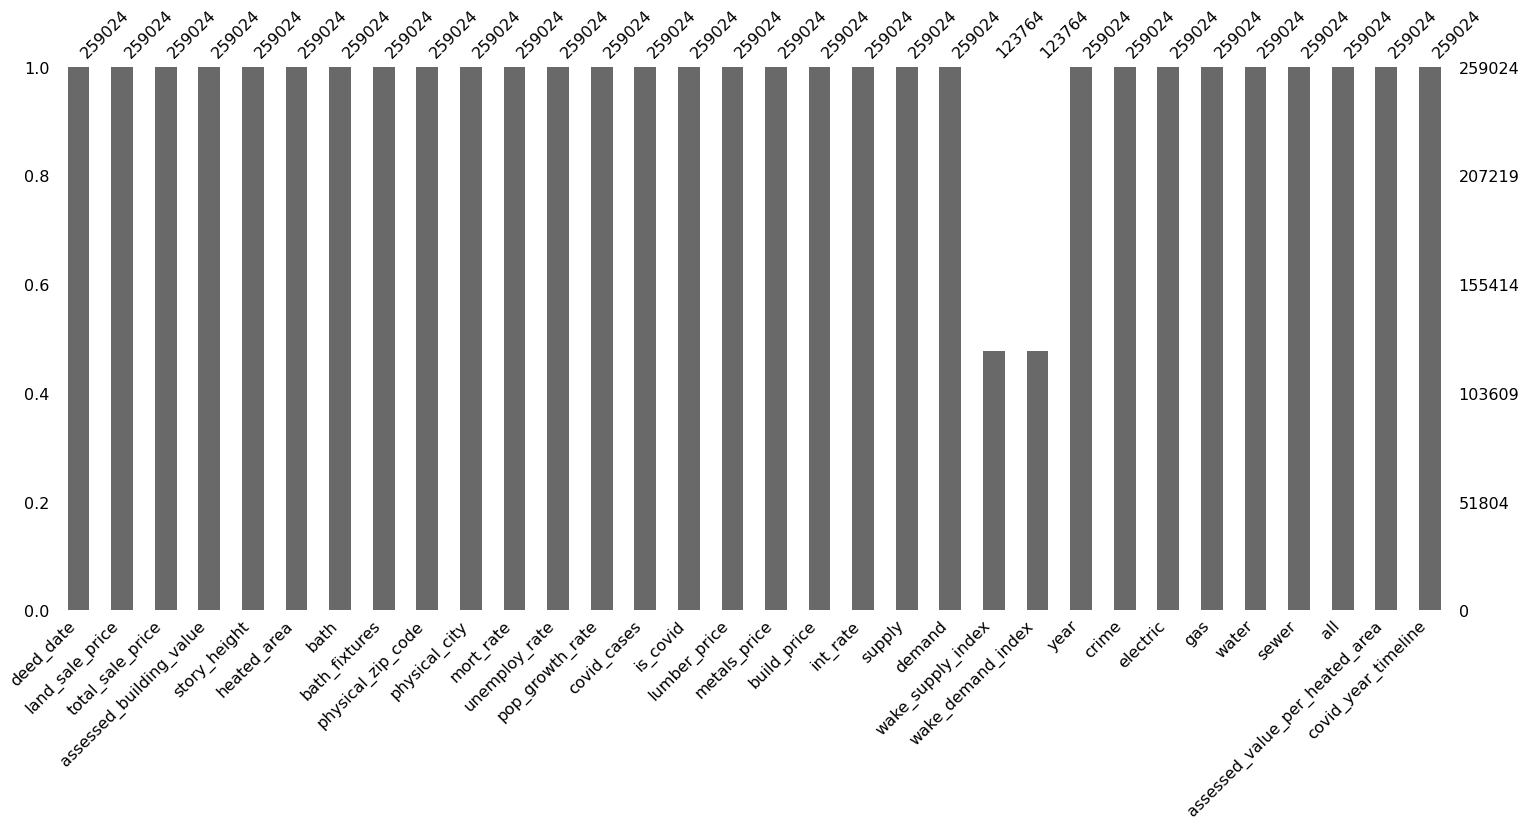

In [87]:
msno.bar(updated_house_df)

Since there is no Wake County house supply and demand data before 2017, we will leave the missing values as it.

# Save as a CSV file

In [88]:
# uncomment to save the data as a CSV file in your local drive if needed
updated_house_df.to_csv(os.path.join(folder_path, 'updated_house_df.csv'), index=False)